In [16]:
import matplotlib.pyplot as plt
import numpy as np
#使用 gensim 將單詞轉成向量 Word2Vec
#KeyedVectors：可查單詞它的詞向量
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [17]:
np.random.seed(12)

#詞向量檔案根據Google News中的資料進行訓練，其中每個單字都會被映射到一個300維的向量，表示該詞的語義訊息，檔案很大 
#讀取詞向量模型，限定前50000個
vectors = KeyedVectors.load_word2vec_format(
  './datasets/GoogleNews-vectors-negative300.bin',
  binary=True, limit=50000)
vectors.key_to_index # dict型式

{'</s>': 0,
 'in': 1,
 'for': 2,
 'that': 3,
 'is': 4,
 'on': 5,
 '##': 6,
 'The': 7,
 'with': 8,
 'said': 9,
 'was': 10,
 'the': 11,
 'at': 12,
 'not': 13,
 'as': 14,
 'it': 15,
 'be': 16,
 'from': 17,
 'by': 18,
 'are': 19,
 'I': 20,
 'have': 21,
 'he': 22,
 'will': 23,
 'has': 24,
 '####': 25,
 'his': 26,
 'an': 27,
 'this': 28,
 'or': 29,
 'their': 30,
 'who': 31,
 'they': 32,
 'but': 33,
 '$': 34,
 'had': 35,
 'year': 36,
 'were': 37,
 'we': 38,
 'more': 39,
 '###': 40,
 'up': 41,
 'been': 42,
 'you': 43,
 'its': 44,
 'one': 45,
 'about': 46,
 'would': 47,
 'which': 48,
 'out': 49,
 'can': 50,
 'It': 51,
 'all': 52,
 'also': 53,
 'two': 54,
 'after': 55,
 'first': 56,
 'He': 57,
 'do': 58,
 'time': 59,
 'than': 60,
 'when': 61,
 'We': 62,
 'over': 63,
 'last': 64,
 'new': 65,
 'other': 66,
 'her': 67,
 'people': 68,
 'into': 69,
 'In': 70,
 'our': 71,
 'there': 72,
 'A': 73,
 'she': 74,
 'could': 75,
 'just': 76,
 'years': 77,
 'some': 78,
 'U.S.': 79,
 'three': 80,
 'million': 81

In [18]:
print(len(vectors))
print(vectors.get_vector("apple"))# 查apple對應的詞向量

50000
[-0.06445312 -0.16015625 -0.01208496  0.13476562 -0.22949219  0.16210938
  0.3046875  -0.1796875  -0.12109375  0.25390625 -0.01428223 -0.06396484
 -0.08056641 -0.05688477 -0.19628906  0.2890625  -0.05151367  0.14257812
 -0.10498047 -0.04736328 -0.34765625  0.35742188  0.265625    0.00188446
 -0.01586914  0.00195312 -0.35546875  0.22167969  0.05761719  0.15917969
  0.08691406 -0.0267334  -0.04785156  0.23925781 -0.05981445  0.0378418
  0.17382812 -0.41796875  0.2890625   0.32617188  0.02429199 -0.01647949
 -0.06494141 -0.08886719  0.07666016 -0.15136719  0.05249023 -0.04199219
 -0.05419922  0.00108337 -0.20117188  0.12304688  0.09228516  0.10449219
 -0.00408936 -0.04199219  0.01409912 -0.02111816 -0.13476562 -0.24316406
  0.16015625 -0.06689453 -0.08984375 -0.07177734 -0.00595093 -0.00482178
 -0.00089264 -0.30664062 -0.0625      0.07958984 -0.00909424 -0.04492188
  0.09960938 -0.33398438 -0.3984375   0.05541992 -0.06689453 -0.04467773
  0.11767578 -0.13964844 -0.26367188  0.174804

In [19]:
print('hello =', vectors['hello'])#'hello'的向量


hello = [-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.108398

In [20]:
print(vectors.most_similar("nice"))#查相似詞

[('good', 0.6836091876029968), ('lovely', 0.6676310896873474), ('neat', 0.6616737246513367), ('fantastic', 0.6569240689277649), ('wonderful', 0.6561347246170044), ('terrific', 0.6552367806434631), ('great', 0.6454657912254333), ('awesome', 0.6404187679290771), ('nicer', 0.6302445530891418), ('decent', 0.5993332862854004)]


In [21]:
words = [word for word in vectors.index_to_key[:200]]

embeddings = [vectors[word] for word in words]
embeddings = np.array(embeddings)
words_embedded = TSNE(n_components=2).fit_transform(embeddings)


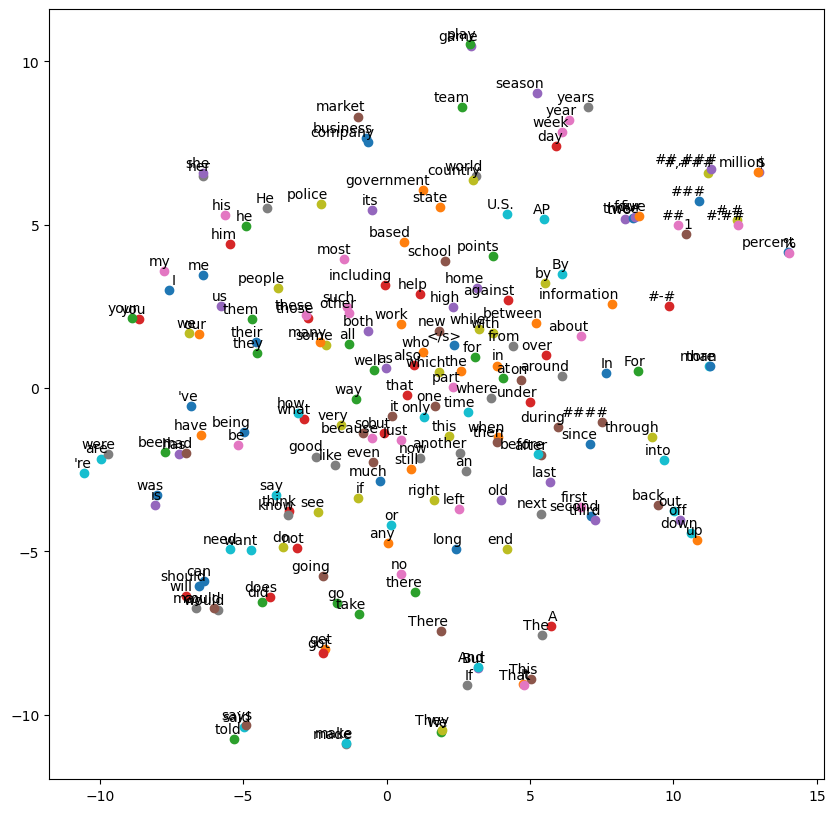

In [22]:
#繪圖
plt.figure(figsize=(10, 10))
for i, label in enumerate(words):
  x, y = words_embedded[i, :]
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
               ha='right', va='bottom')
plt.savefig('TSNE.png')
plt.show()


In [23]:
capitals = ['Beijing', 'Moscow', 'Washington', 'Tokyo', 'Rome','Paris', 'Berlin', 'Athens', 'London', 'Ottawa']
countries = ['China', 'Russia', 'America', 'Japan', 'Italy','France', 'Germany', 'Greece', 'England', 'Canada']
embeddings = [vectors[word] for word in capitals + countries]
words_embedded = PCA(n_components=2).fit_transform(embeddings)


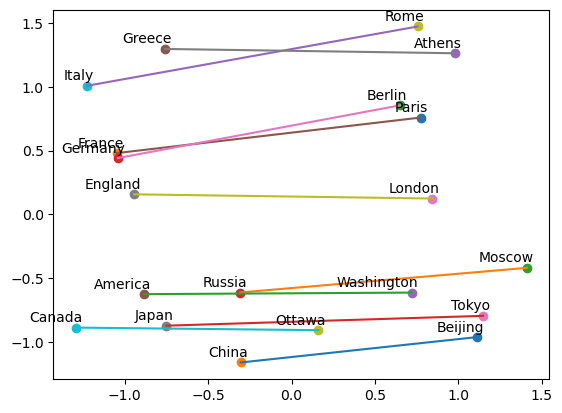

In [24]:
num_pairs = len(capitals)

for i in range(num_pairs):
  x1, y1 = words_embedded[i]  # capital
  plt.scatter(x1, y1)
  plt.annotate(capitals[i], xy=(x1, y1), xytext=(5, 2),
               textcoords='offset points', ha='right', va='bottom')

  x2, y2 = words_embedded[i + num_pairs]  # country
  plt.scatter(x2, y2)
  plt.annotate(countries[i], xy=(x2, y2), xytext=(5, 2),
               textcoords='offset points', ha='right', va='bottom')
  plt.plot([x1, x2], [y1, y2])
plt.show()


In [25]:
print('Friday', vectors.most_similar(positive=['Friday'], topn=3))

print('king + woman - man = ?',
      vectors.most_similar(positive=['king', 'woman'],
                           negative=['man'], topn=3))


Friday [('Thursday', 0.952563464641571), ('Monday', 0.9435935616493225), ('Wednesday', 0.9328287839889526)]
king + woman - man = ? [('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951)]


In [14]:

analogy_file = './datasets/questions-words.txt'
result = vectors.evaluate_word_analogies(analogy_file)
print('Analogy accuracy:', result[0])
for section_result in result[1]:
  print('section name:', section_result['section'],
        ', correct:', section_result['correct'])


Analogy accuracy: 0.7560580536477906
section name: capital-common-countries , correct: [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'), ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'), ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'), ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'), ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'), ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'), ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'), ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'), ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'), ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'), ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'), ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'), ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'), ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'), ('ATHENS', 'GREECE', 'ROME', 'ITALY'), ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'), ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'), ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'), ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'), ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'), ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'), ('BAGHDAD', 'IRAQ', '